# Signal analisys and filtering

In [12]:
# So in this part we will analyse some random signals and try to filter particular part, just for practise
import scipy as sp
import matplotlib.pyplot as plotter
from scipy import signal
%matplotlib inline

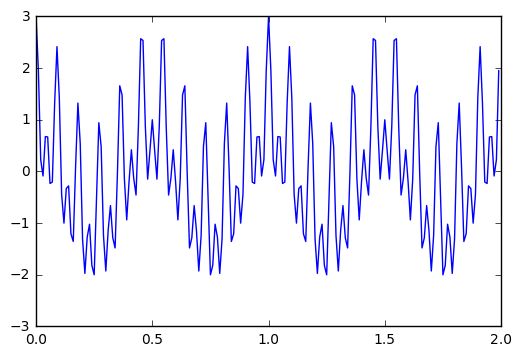

In [13]:
Fs = 100 #[Hz]
t = sp.arange(0,2,1/Fs)
x = sp.cos(2*sp.pi*t*2) + sp.cos(2*sp.pi*t*11) + sp.cos(2*sp.pi*t*22)
plotter.plot(t,x,'b')

<Container object of 3 artists>

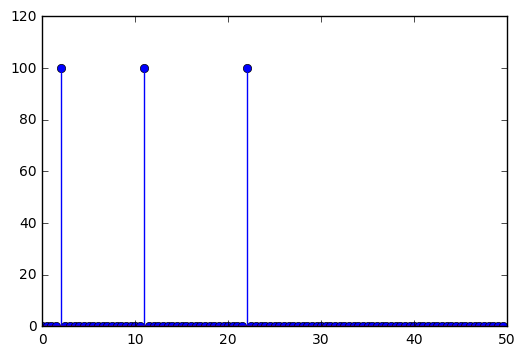

In [14]:
# Now we want to analyse the spectrum of the signal so we can see which part we want to filter
X = sp.fft(x)
F = sp.linspace(0,Fs,len(x)+1)
F = F[:-1]
N = len(X)
plotter.stem(F[0:int(N/2)], sp.absolute(X[0:int(N/2)]), 'b')

In [15]:
# We want lowpass filter to filter out the part at 2Hz
b,a = signal.butter(5,0.1, btype = 'low')
w,h = signal.freqz(b,a)
fNorm = w / sp.pi
fNew = fNorm * (Fs/2)

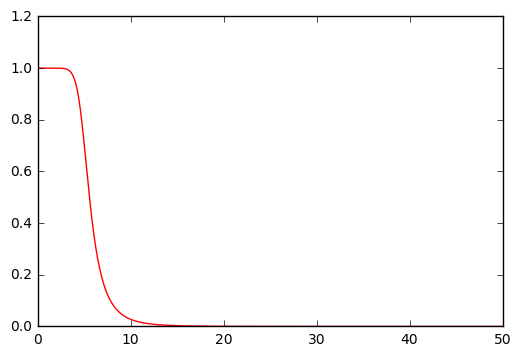

In [16]:
# This is how our filter looks
plotter.plot(fNew, sp.absolute(h), 'r')

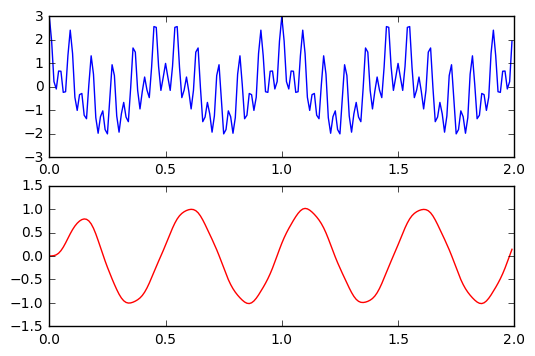

In [17]:
# Now lets compare the unfiltered and filtered signal
y = signal.lfilter(b,a,x)
plt.subplot(211)
plt.plot(t,x, 'b')
plt.subplot(212)
plt.plot(t,y, 'r')

<Container object of 3 artists>

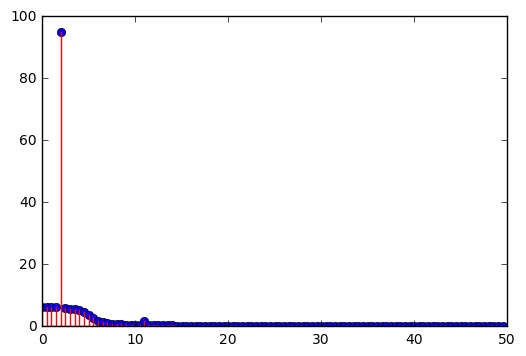

In [19]:
# Filtered signal spectrum
Y = sp.fft(y)
F = sp.linspace(0,Fs, len(Y)+1)
F = F[:-1]
N = len(Y)
plotter.stem(F[0:int(N/2)], sp.absolute(Y[0:int(N/2)]),'r')

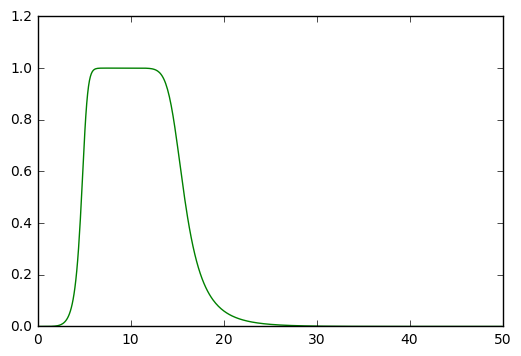

In [20]:
# Now lets say we want only the signal at 11Hz, we will need a bandpass filter
b,a = signal.butter(5,[0.1, 0.3], btype = 'bandpass')
w,h = signal.freqz(b,a)
fNorm = w / sp.pi
fNew = fNorm * (Fs/2)
plotter.plot(fNew, sp.absolute(h), 'g')

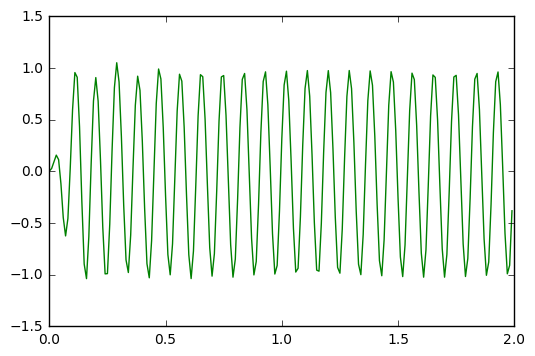

In [21]:
# So here we will plot the filtered signal to see the difference
y2 = signal.lfilter(b,a,x)
plotter.plot(t,y2,'g')

<Container object of 3 artists>

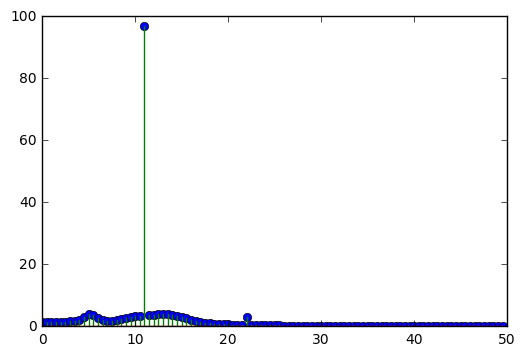

In [22]:
# and the filtered signal spectrum
Y2 = sp.fft(y2)
F = sp.linspace(0,Fs, len(Y2)+1)
F = F[:-1]
N = len(Y2)
plotter.stem(F[0:int(N/2)], sp.absolute(Y2[0:int(N/2)]),'g')

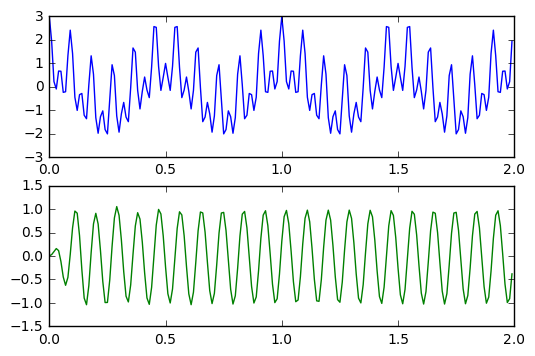

In [23]:
# so here we can compare the beggining signal and the one that has only 11Hz component
plotter.subplot(211)
plotter.plot(t,x, 'b')
plotter.subplot(212)
plotter.plot(t,y2, 'g')

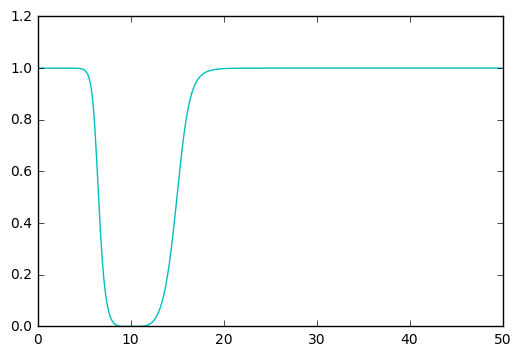

In [32]:
# Now lets say we want to keep everything but the signal at 11Hz, we will need to use the bandstop filter
b,a = signal.butter(5,[0.125,0.312], btype = 'bandstop')
w,h = signal.freqz(b,a)
fNorm = w / sp.pi
fNew = fNorm * (Fs/2)
plotter.plot(fNew, sp.absolute(h), 'c')

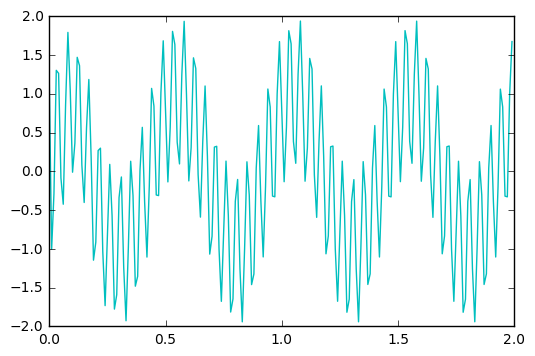

In [33]:
# And the filtered signal would look like this
y3 = signal.lfilter(b,a,x)
plotter.plot(t,y3, 'c')

<Container object of 3 artists>

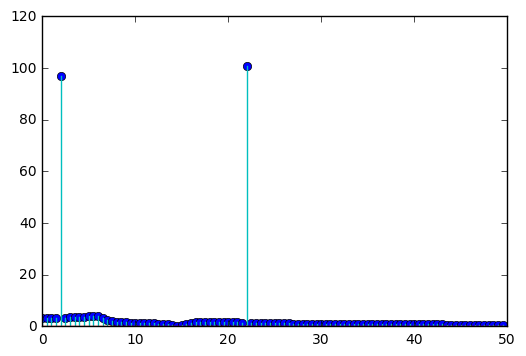

In [34]:
# While the filtered signal spectrum would be the following
Y3 = sp.fft(y3)
F = sp.linspace(0,Fs, len(Y3)+1)
F = F[:-1]
N = len(Y3)
plotter.stem(F[0:int(N/2)], sp.absolute(Y3[0:int(N/2)]),'c')

In [77]:
# High pass filter to take out the 23Hz component
b,a = signal.butter(9, 0.46, btype = 'high')

w,h = signal.freqz(b,a)
fNorm = w / sp.pi
fNew = fNorm * (Fs/2)

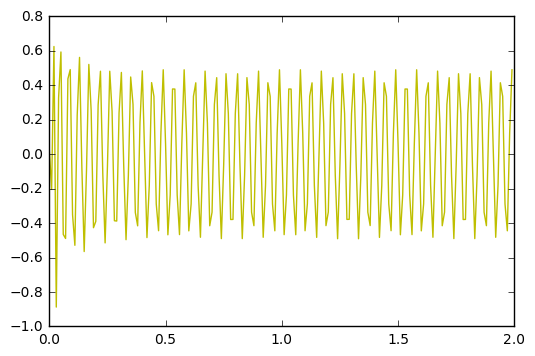

In [78]:
# Now we check how the signal looks
y4 = signal.lfilter(b,a,x)
plotter.plot(t,y4,'y')

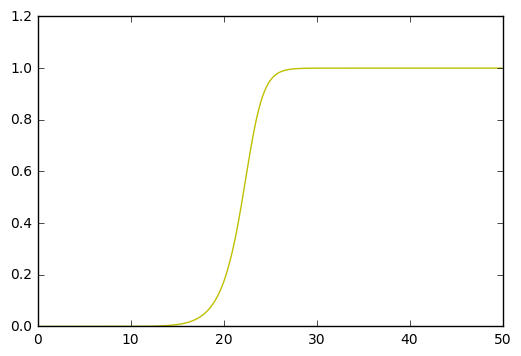

In [79]:
# We can find the look of the filter on the next graph
plotter.plot(fNew, sp.absolute(h), 'y')

<Container object of 3 artists>

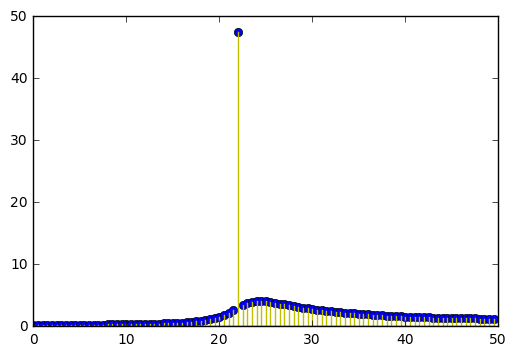

In [80]:
# And the spectrum of the filtered signal, to make sure we have gotten the right value
Y4 = sp.fft(y4)
F = sp.linspace(0,Fs, len(Y4)+1)
F = F[:-1]
N = len(Y4)
plotter.stem(F[0:int(N/2)], sp.absolute(Y4[0:int(N/2)]),'y')

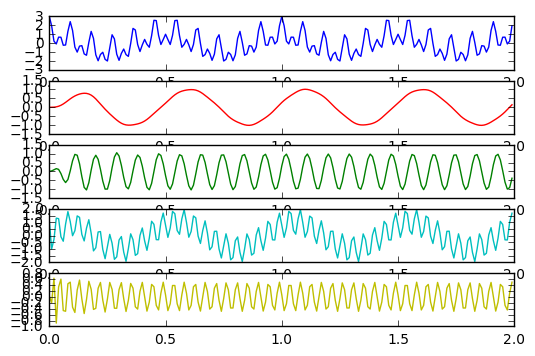

In [84]:
# Here we can see the looks of starting signal and the filtered signal looks
plotter.subplot(511)
plotter.plot(t,x, 'b')
plotter.subplot(512)
plotter.plot(t,y, 'r')
plotter.subplot(513)
plotter.plot(t,y2, 'g')
plotter.subplot(514)
plotter.plot(t,y3, 'c')
plotter.subplot(515)
plotter.plot(t,y4, 'y')

<Container object of 3 artists>

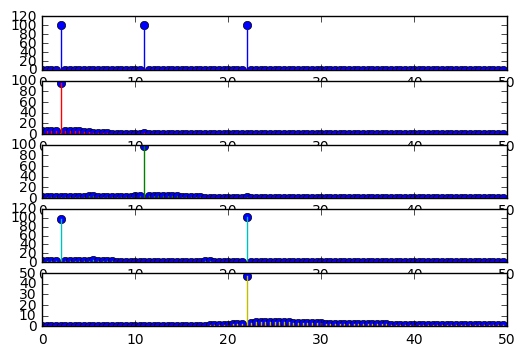

In [86]:
# Here is the spectrum of the signals
plotter.subplot(511)
plotter.stem(F[0:int(N/2)], sp.absolute(X[0:int(N/2)]),'b')
plotter.subplot(512)
plotter.stem(F[0:int(N/2)], sp.absolute(Y[0:int(N/2)]),'r')
plotter.subplot(513)
plotter.stem(F[0:int(N/2)], sp.absolute(Y2[0:int(N/2)]),'g')
plotter.subplot(514)
plotter.stem(F[0:int(N/2)], sp.absolute(Y3[0:int(N/2)]),'c')
plotter.subplot(515)
plotter.stem(F[0:int(N/2)], sp.absolute(Y4[0:int(N/2)]),'y')